---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# HW2: Machine Learning Basics

**Due date is 09/18/2023 at 9:30 am**

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.
Source: https://www.deeplearning.ai/

**Instructions:**
- You will be using Python 3.
- Avoid using for-loops and while-loops, unless you are explicitly told to do so.
- Do not modify the (# GRADED FUNCTION [function name]) comment in some cells. Your work would not be graded if you change this. Each cell containing that comment should only contain one function.
- After coding your function, run the cell right below it to check if your result is correct.


## Part 1 - Regression

First, run the following block to set up the variables needed for later sections.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
# NOTE: Uncomment the function below to visualize the data, but be sure 
# to **re-comment it before submitting this assignment**.   
# part1_scatter()

### Question 1

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="files/polynomialreg1.png" style="width: 1000px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [8]:
import numpy as np
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    # To capture interactions between the original features by adding them as features to the linear model.
    
    clf = LinearRegression() # Initialize linear classifier
    preds = np.zeros((4,100)) # Final tuple with predictions for all orders.
    X_input = np.linspace(0,10,100) # Given requirement
    orders = [1,3,6,9] # Given requirement
    
    ### START CODE HERE ### 
    for i in range(len(orders)):
        poly = PolynomialFeatures(orders[i]) # Object to add polynomial features.
        
        # Add polynomial features to training data and input data:
        # Need to transpose X_train and X_input for poly_fit to work.
        X_train_poly = poly.fit_transform(X_train[None].T)
        X_input_poly = poly.fit_transform(X_input[None].T)
        
        # Train linear regression classifier with training data:
        clf.fit(X_train_poly, y_train)
        
        # Get predictions from linear classifier using transformed input data:
        # This is still a weighted linear combination of features, so it's still a linear model, and can use same least-squares estimation method for w and b.
        preds[i,:] = clf.predict(X_input_poly)
    ### END CODE HERE ###
    
    return preds

answer_one()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

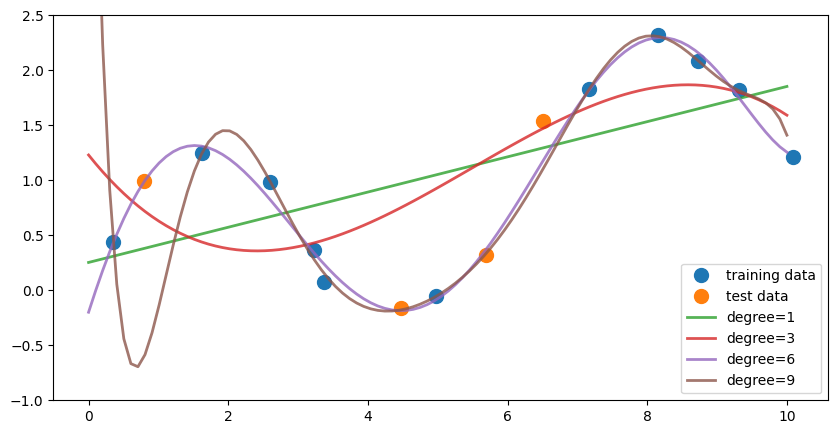

In [11]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]): # i is the index of the content (used for iteration in the for loop), degree is the content.
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple. Note that the coefficient of determination, or R2 , is a measure that provides information about the goodness of fit of a model. Its value ranges between 0-1 with 1 indicating that the data perfectly fit the linear model.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [13]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score
    
    r2_test, r2_train = [],[]
    
    ### START CODE HERE ###
    for i in range (10):
        poly = PolynomialFeatures(i)
        X_train_poly = poly.fit_transform(X_train[None].T)
        X_test_poly = poly.fit_transform(X_test[None].T)
        linreg = LinearRegression().fit(X_train_poly,y_train)
        r2_train.append(linreg.score(X_train_poly,y_train))
        r2_test.append(linreg.score(X_test_poly,y_test))
    ### END CODE HERE ###
    return (r2_train, r2_test)

answer_two()

([0.0,
  0.4292457781234663,
  0.45109980444082465,
  0.5871995368779848,
  0.9194194471769302,
  0.9757864143068198,
  0.9901823324795092,
  0.9935250927840389,
  0.996375453877377,
  0.9980370625647865],
 [-0.4780864173714179,
  -0.45237104233936676,
  -0.06856984149915935,
  0.005331052945774517,
  0.7300494281868406,
  0.8770830091632688,
  0.9214093981386797,
  0.9202150412782739,
  0.6324793896188281,
  -0.6452526008408122])

### Question 3

Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

Hint: Try plotting the $R^2$ scores from question 2 to visualize the relationship between degree level and $R^2$.

*This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`. There might be multiple correct solutions, however, you only need to return one possible solution, for example, (1,2,3).* 

(0, 9, 6)

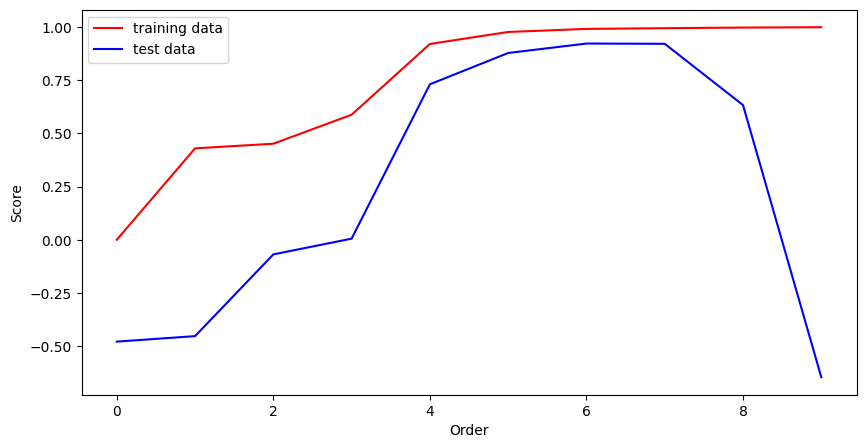

In [14]:
def answer_three():
     ### START CODE HERE ###
 
    
    return (.,.,.) 
 ### END CODE HERE ###
answer_three()

### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Ridge Regression model (with parameters `alpha=0.05`, `normalize=True`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Ridge model's test sets.

A good tutorial: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

*This function should return one tuple `(LinearRegression_R2_test_score, Ridge_R2_test_score)`*

In [13]:
def answer_four():
    
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics import r2_score
### START CODE HERE ###

    return (.,.)
### END CODE HERE ###


answer_four()

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(-4.3120017974975458, 0.8406625614750235)

## Part 2 - Classification

Here's an application of machine learning that could save your life! For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `files/mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

#mush_df

### Question 5

Using `X_train2` and `y_train2` from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

As a reminder, the feature names are available in the `X_train2.columns` property, and the order of the features in `X_train2.columns` matches the order of the feature importance values in the classifier's `feature_importances_` property. 

*This function should return a list of length 5 containing the feature names in descending order of importance.*

*Note: remember that you also need to set random_state in the DecisionTreeClassifier.*

In [9]:
# Feature names in X_train2.columns and feature_importances_ are in the same order. NOT SORTED!!
# Sort feature names by feature_importances_ !!

def answer_five():
    from sklearn.tree import DecisionTreeClassifier
    ### START CODE HERE ###

    
    ### END CODE HERE ###
    
answer_five()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

Congratulations on completing this assignment.

**What to Submit:**
- Your ipython code (.ipynb extension)
- Submit on Canvas.

You need to make sure that you ipython code will run in any computer with Python 3 installed. The codes with bugs which won't run in my computer, won't get the full credit.